<a href="https://colab.research.google.com/github/DangMinh21/CS114.L22.KHCL/blob/main/Do_an_cuoi_ki/HandWrittenCharacterWith_HogData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import time

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 40,40

In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/x_train_hog.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/y_train_hog.csv')
y_train = y_train['label']
x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/x_test_hog.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/y_test_hog.csv')
y_test = y_test['label']

In [ ]:
label_dict = dict()
labels = []
with open('/content/drive/MyDrive/Colab Notebooks/dataML/KiTu_So.txt', 'r') as f:
  lines = f.readlines()
for line in lines:
  l = line.split()
  label_dict[int(l[0])] = l[1]
  labels.append(l[1])
print('label tương ứng: ')
print(label_dict)
print(labels)

label tương ứng: 
{1: 'a', 2: 'á', 3: 'à', 4: 'ả', 5: 'ạ', 6: 'ã', 7: 'ă', 8: 'ắ', 9: 'ằ', 10: 'ẳ', 11: 'ặ', 12: 'ẵ', 13: 'â', 14: 'ấ', 15: 'ầ', 16: 'ẩ', 17: 'ậ', 18: 'ẫ', 19: 'b', 20: 'c', 21: 'd', 22: 'đ', 23: 'e', 24: 'é', 25: 'è', 26: 'ẻ', 27: 'ẹ', 28: 'ẽ', 29: 'ê', 30: 'ế', 31: 'ề', 32: 'ể', 33: 'ệ', 34: 'ễ', 35: 'g', 36: 'h', 37: 'i', 38: 'í', 39: 'ì', 40: 'ỉ', 41: 'ị', 42: 'ĩ', 43: 'k', 44: 'l', 45: 'm', 46: 'n', 47: 'o', 48: 'ó', 49: 'ò', 50: 'ỏ', 51: 'ọ', 52: 'õ', 53: 'ô', 54: 'ố', 55: 'ồ', 56: 'ổ', 57: 'ộ', 58: 'ỗ', 59: 'ơ', 60: 'ớ', 61: 'ờ', 62: 'ở', 63: 'ợ', 64: 'ỡ', 65: 'p', 66: 'q', 67: 'r', 68: 's', 69: 't', 70: 'u', 71: 'ú', 72: 'ù', 73: 'ủ', 74: 'ụ', 75: 'ũ', 76: 'ư', 77: 'ứ', 78: 'ừ', 79: 'ử', 80: 'ự', 81: 'ữ', 82: 'v', 83: 'x', 84: 'y', 85: 'ý', 86: 'ỳ', 87: 'ỹ', 88: 'ỷ', 89: 'ỵ'}
['a', 'á', 'à', 'ả', 'ạ', 'ã', 'ă', 'ắ', 'ằ', 'ẳ', 'ặ', 'ẵ', 'â', 'ấ', 'ầ', 'ẩ', 'ậ', 'ẫ', 'b', 'c', 'd', 'đ', 'e', 'é', 'è', 'ẻ', 'ẹ', 'ẽ', 'ê', 'ế', 'ề', 'ể', 'ệ', 'ễ', 'g', 'h', 'i', 'í'

In [ ]:
print(f'Train size: X -  {x_train.shape}, Y - {y_train.shape}')
print(f'Test size: X-  {x_test.shape}, Y - {y_test.shape}')

Train size: X -  (26278, 1764), Y - (26278,)
Test size: X-  (8759, 1764), Y - (8759,)



# Model


## Logistic Regression

In [ ]:
modelLR = LogisticRegression(max_iter=1000)

parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1, 2, 10, 20, 100], 'solver':['saga']}
clfLR = GridSearchCV(estimator=modelLR, param_grid=parameters, scoring='accuracy', verbose=4)
clfLR.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.01, solver=saga .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=0.01, solver=saga, score=0.567, total= 8.5min
[CV] C=0.01, solver=saga .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.5min remaining:    0.0s


[CV] ................. C=0.01, solver=saga, score=0.580, total= 8.8min
[CV] C=0.01, solver=saga .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 17.3min remaining:    0.0s


[CV] ................. C=0.01, solver=saga, score=0.550, total= 8.5min
[CV] C=0.01, solver=saga .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 25.9min remaining:    0.0s


[CV] ................. C=0.01, solver=saga, score=0.539, total= 8.5min
[CV] C=0.01, solver=saga .............................................
[CV] ................. C=0.01, solver=saga, score=0.582, total= 8.8min
[CV] C=0.05, solver=saga .............................................
[CV] ................. C=0.05, solver=saga, score=0.622, total=28.5min
[CV] C=0.05, solver=saga .............................................
[CV] ................. C=0.05, solver=saga, score=0.631, total=28.1min
[CV] C=0.05, solver=saga .............................................
[CV] ................. C=0.05, solver=saga, score=0.612, total=28.2min
[CV] C=0.05, solver=saga .............................................
[CV] ................. C=0.05, solver=saga, score=0.599, total=29.0min
[CV] C=0.05, solver=saga .............................................
[CV] ................. C=0.05, solver=saga, score=0.628, total=29.1min
[CV] C=0.1, solver=saga ..............................................
[CV] .

### LR c=0.01, solver = saga

In [ ]:
modelLR1 = LogisticRegression(C=0.01 ,solver='saga', max_iter=500)
start_time = time.time()
modelLR1.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR1.score(x_train, y_train)}')
print(f'Test Score: {modelLR1.score(x_test, y_test)}')

Timer: 657.4890692234039
Train Score: 0.6918715275135094
Test Score: 0.6066902614453705


In [ ]:
pickle.dump(modelLR1, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelLR1.pickle','wb'))

### LR C=0.1, solver=saga

In [ ]:
modelLR2 = LogisticRegression(C=0.1 ,solver='saga', max_iter=500)
start_time = time.time()
modelLR2.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR2.score(x_train, y_train)}')
print(f'Test Score: {modelLR2.score(x_test, y_test)}')

Timer: 3211.456108570099
Train Score: 0.8814978308851511
Test Score: 0.6745062221714807


In [ ]:
pickle.dump(modelLR2, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelLR2.pickle','wb'))

### LR C=1, solver=saga

In [ ]:
modelLR4 = LogisticRegression(C=1 ,solver='saga', max_iter=1000)
start_time = time.time()
modelLR4.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR4.score(x_train, y_train)}')
print(f'Test Score: {modelLR4.score(x_test, y_test)}')

Timer: 6575.443093776703
Train Score: 0.9916660324225588
Test Score: 0.6600068500970431


In [ ]:
pickle.dump(modelLR4, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelLR4.pickle','wb'))

### LR C=10, solver=sag

In [ ]:
modelLR6 = LogisticRegression(C=10 ,solver='saga', max_iter=200)
start_time = time.time()
modelLR6.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR6.score(x_train, y_train)}')
print(f'Test Score: {modelLR6.score(x_test, y_test)}')

In [ ]:
pickle.dump(modelLR6, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelLR6.pickle','wb'))

### model LR c=0,1 solver=saga cho kết quả cao nhất

Train Score: 0.8814978308851511


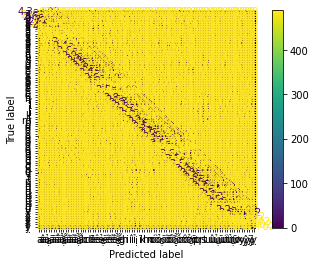

classification report on train set
              precision    recall  f1-score   support

           a       0.89      0.95      0.92       450
           á       0.85      0.86      0.86       284
           à       0.80      0.86      0.83       308
           ả       0.87      0.86      0.87       298
           ạ       0.97      0.94      0.95       280
           ã       0.85      0.70      0.77       308
           ă       0.73      0.85      0.79       491
           ắ       0.86      0.74      0.79       258
           ằ       0.88      0.85      0.87       280
           ẳ       0.87      0.81      0.84       234
           ặ       0.93      0.89      0.91       242
           ẵ       0.91      0.80      0.85       227
           â       0.79      0.86      0.82       347
           ấ       0.88      0.82      0.85       254
           ầ       0.85      0.82      0.83       299
           ẩ       0.83      0.76      0.79       268
           ậ       0.96      0.94      0.95   

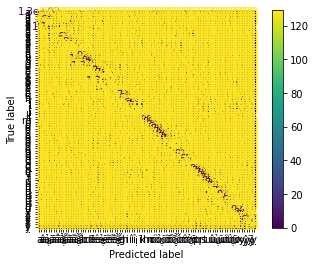

classification report on test set
              precision    recall  f1-score   support

           a       0.75      0.93      0.83       136
           á       0.59      0.59      0.59        91
           à       0.46      0.57      0.51       108
           ả       0.67      0.67      0.67       103
           ạ       0.86      0.74      0.80        87
           ã       0.55      0.39      0.46       102
           ă       0.53      0.65      0.58       173
           ắ       0.46      0.36      0.40        92
           ằ       0.53      0.48      0.51        95
           ẳ       0.46      0.42      0.44        80
           ặ       0.78      0.76      0.77        86
           ẵ       0.52      0.44      0.48        77
           â       0.66      0.70      0.68       126
           ấ       0.59      0.44      0.50        94
           ầ       0.58      0.55      0.57        89
           ẩ       0.57      0.58      0.58        96
           ậ       0.68      0.74      0.71    

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelLR2.pickle", 'rb') as file_model:
    modelLR = pickle.load(file_model)
    
print(f'Train Score: {modelLR.score(x_train, y_train)}')
cm = plot_confusion_matrix(modelLR, x_train, y_train, display_labels=labels)
plt.show()
print(f'classification report on train set')
predictTrain = modelLR.predict(x_train)
print(classification_report(y_train, predictTrain, target_names=labels))

print(f'Test Score: {modelLR.score(x_test, y_test)}')
cm = plot_confusion_matrix(modelLR, x_test, y_test, display_labels=labels)
plt.show()
print(f'classification report on test set')
predictTest = modelLR.predict(x_test)
print(classification_report(y_test, predictTest, target_names=labels))

### LR C=100, solver=sag

In [ ]:
modelLR7 = LogisticRegression(C=100 ,solver='saga', max_iter=1000)
start_time = time.time()
modelLR7.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR7.score(x_train, y_train)}')
print(f'Test Score: {modelLR7.score(x_test, y_test)}')

In [ ]:
pickle.dump(modelLR7, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelLR7.pickle','wb'))

# SVM

## Linear SVM

In [ ]:
modelLinearSVC = LinearSVC(max_iter=7000)

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clfLinearSVC = GridSearchCV(estimator=modelLinearSVC, param_grid=parameters, scoring='accuracy', verbose=4)
clfLinearSVC.fit(x_train, y_train)

### Linear SVM c = 1

In [ ]:
modelLinearSVM = LinearSVC(max_iter=5000)
start_time = time.time()
modelLinearSVM.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLinearSVM.score(x_train, y_train)}')
print(f'Test Score: {modelLinearSVM.score(x_test, y_test)}')

Timer: 126.56522989273071
Train Score: 0.9998477814141107
Test Score: 0.5953876013243521


### Linear SVM c = 0.1

In [ ]:
modelLinearSVM1 = LinearSVC(C=0.1, max_iter=5000)
start_time = time.time()
modelLinearSVM1.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLinearSVM1.score(x_train, y_train)}')
print(f'Test Score: {modelLinearSVM1.score(x_test, y_test)}')

Timer: 45.83593535423279
Train Score: 0.9759494634294847
Test Score: 0.6450508048864025


### Linear SVM c = 0.05

In [ ]:
modelLinearSVM3 = LinearSVC(C=0.005, max_iter=5000)
start_time = time.time()
modelLinearSVM3.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLinearSVM3.score(x_train, y_train)}')
print(f'Test Score: {modelLinearSVM3.score(x_test, y_test)}')

Timer: 29.661213874816895
Train Score: 0.8338914681482609
Test Score: 0.6527000799177989


## kernel SVM

In [ ]:
modelSVC = svc()

parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1, 2, 10, 20, 100], 'kernel':['poly', 'rbf']}
clfSVC = GridSearchCV(estimator=modelSVC, param_grid=parameters, scoring='accuracy', verbose=4)
clfSVC.fit(x_train, y_train)

### SVM c=1, kernel = rbf

In [ ]:
modelSVM1 = SVC(C=1, kernel='rbf')
start_time = time.time()
modelSVM1.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM1.score(x_train, y_train)}')
print(f'Test Score: {modelSVM1.score(x_test, y_test)}')

Timer: 2178.5127856731415
Train Score: 0.9737422939340894
Test Score: 0.7272519694028998


In [ ]:
pickle.dump(modelSVM1, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelSVM1.pickle','wb'))

### SVM c=1, kernel = poly

In [ ]:
modelSVM2 = SVC(C=1, kernel='poly', max_iter=5000)
start_time = time.time()
modelSVM2.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM2.score(x_train, y_train)}')
print(f'Test Score: {modelSVM2.score(x_test, y_test)}')

Timer: 2928.4446337223053
Train Score: 0.9999619453535277
Test Score: 0.7482589336682269


In [ ]:
pickle.dump(modelSVM2, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelSVM2.pickle','wb'))

In [ ]:
modelSVM3 = SVC(C=10, kernel='rbf')
start_time = time.time()
modelSVM3.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM3.score(x_train, y_train)}')
print(f'Test Score: {modelSVM3.score(x_test, y_test)}')

Timer: 2328.950026512146
Train Score: 0.9999619453535277
Test Score: 0.7415230049092362


In [ ]:
pickle.dump(modelSVM3, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelSVM3.pickle','wb'))

### Kết luận
* Model SVM C=1, kernel=poly cho kết quả tốt nhất

Train Score: 0.8814978308851511


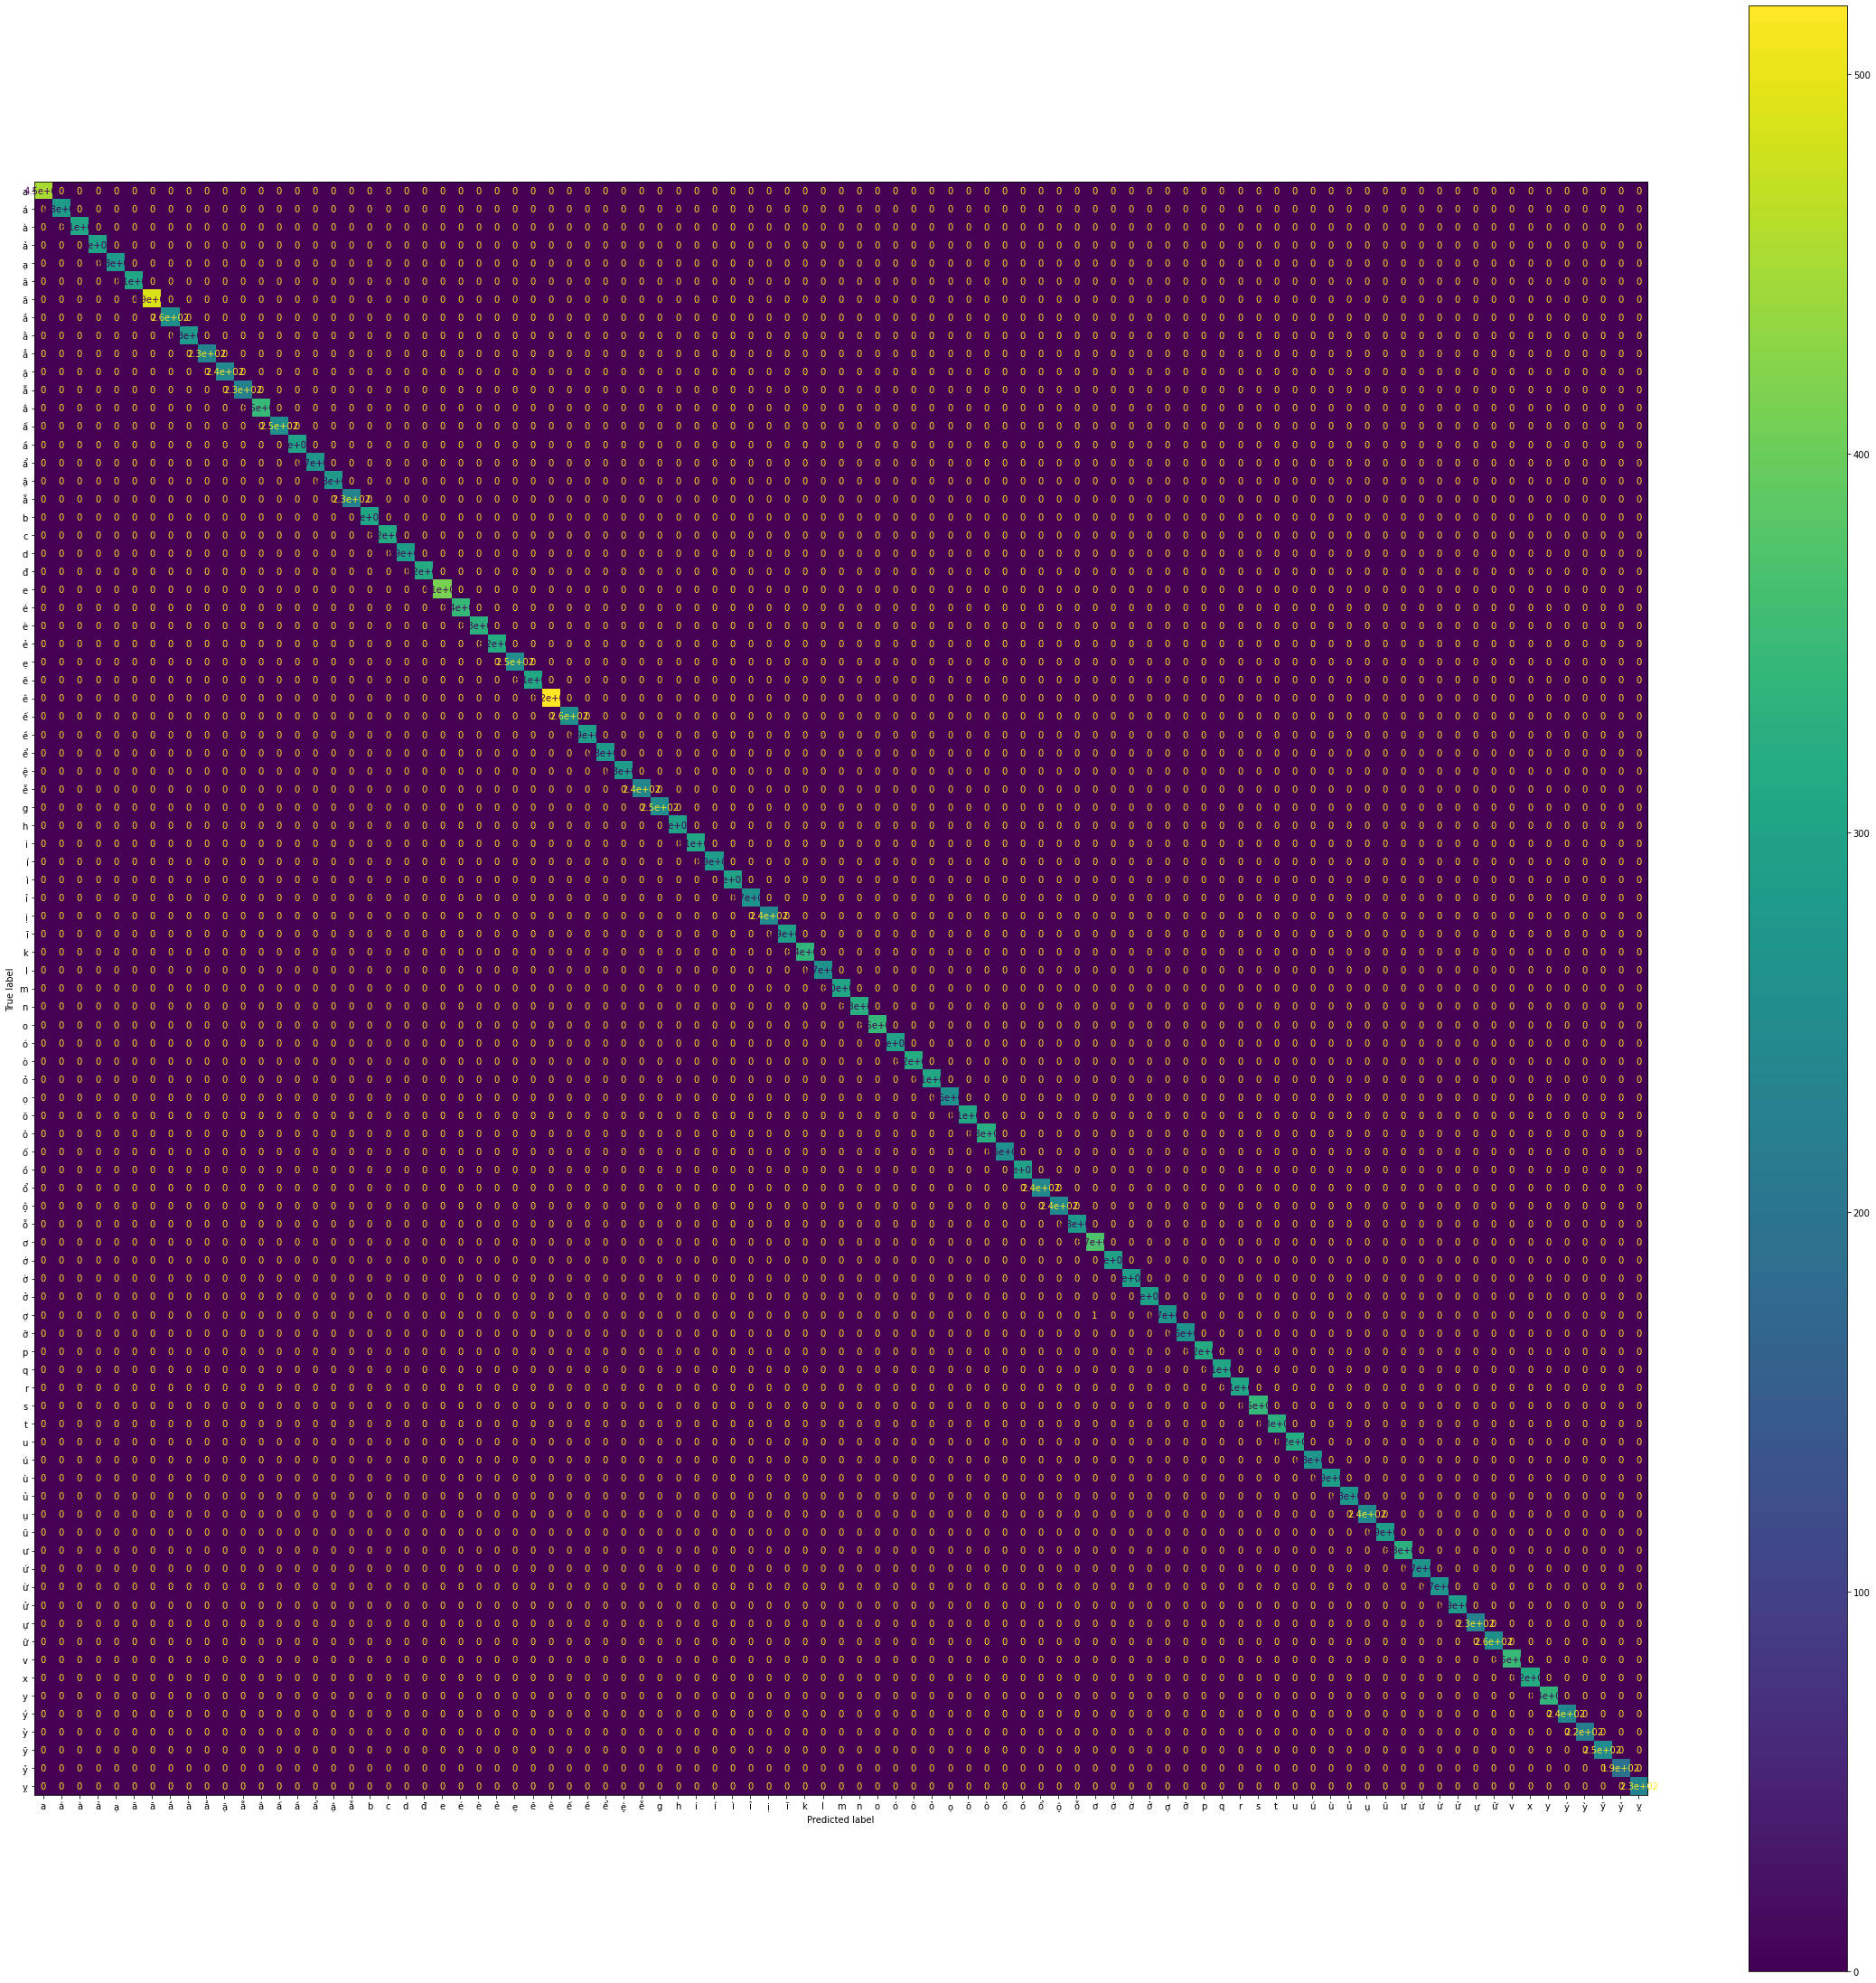

classification report on train set
              precision    recall  f1-score   support

           a       1.00      1.00      1.00       450
           á       1.00      1.00      1.00       284
           à       1.00      1.00      1.00       308
           ả       1.00      1.00      1.00       298
           ạ       1.00      1.00      1.00       280
           ã       1.00      1.00      1.00       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      1.00      1.00       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      1.00      1.00       227
           â       1.00      1.00      1.00       347
           ấ       1.00      1.00      1.00       254
           ầ       1.00      1.00      1.00       299
           ẩ       1.00      1.00      1.00       268
           ậ       1.00      1.00      1.00   

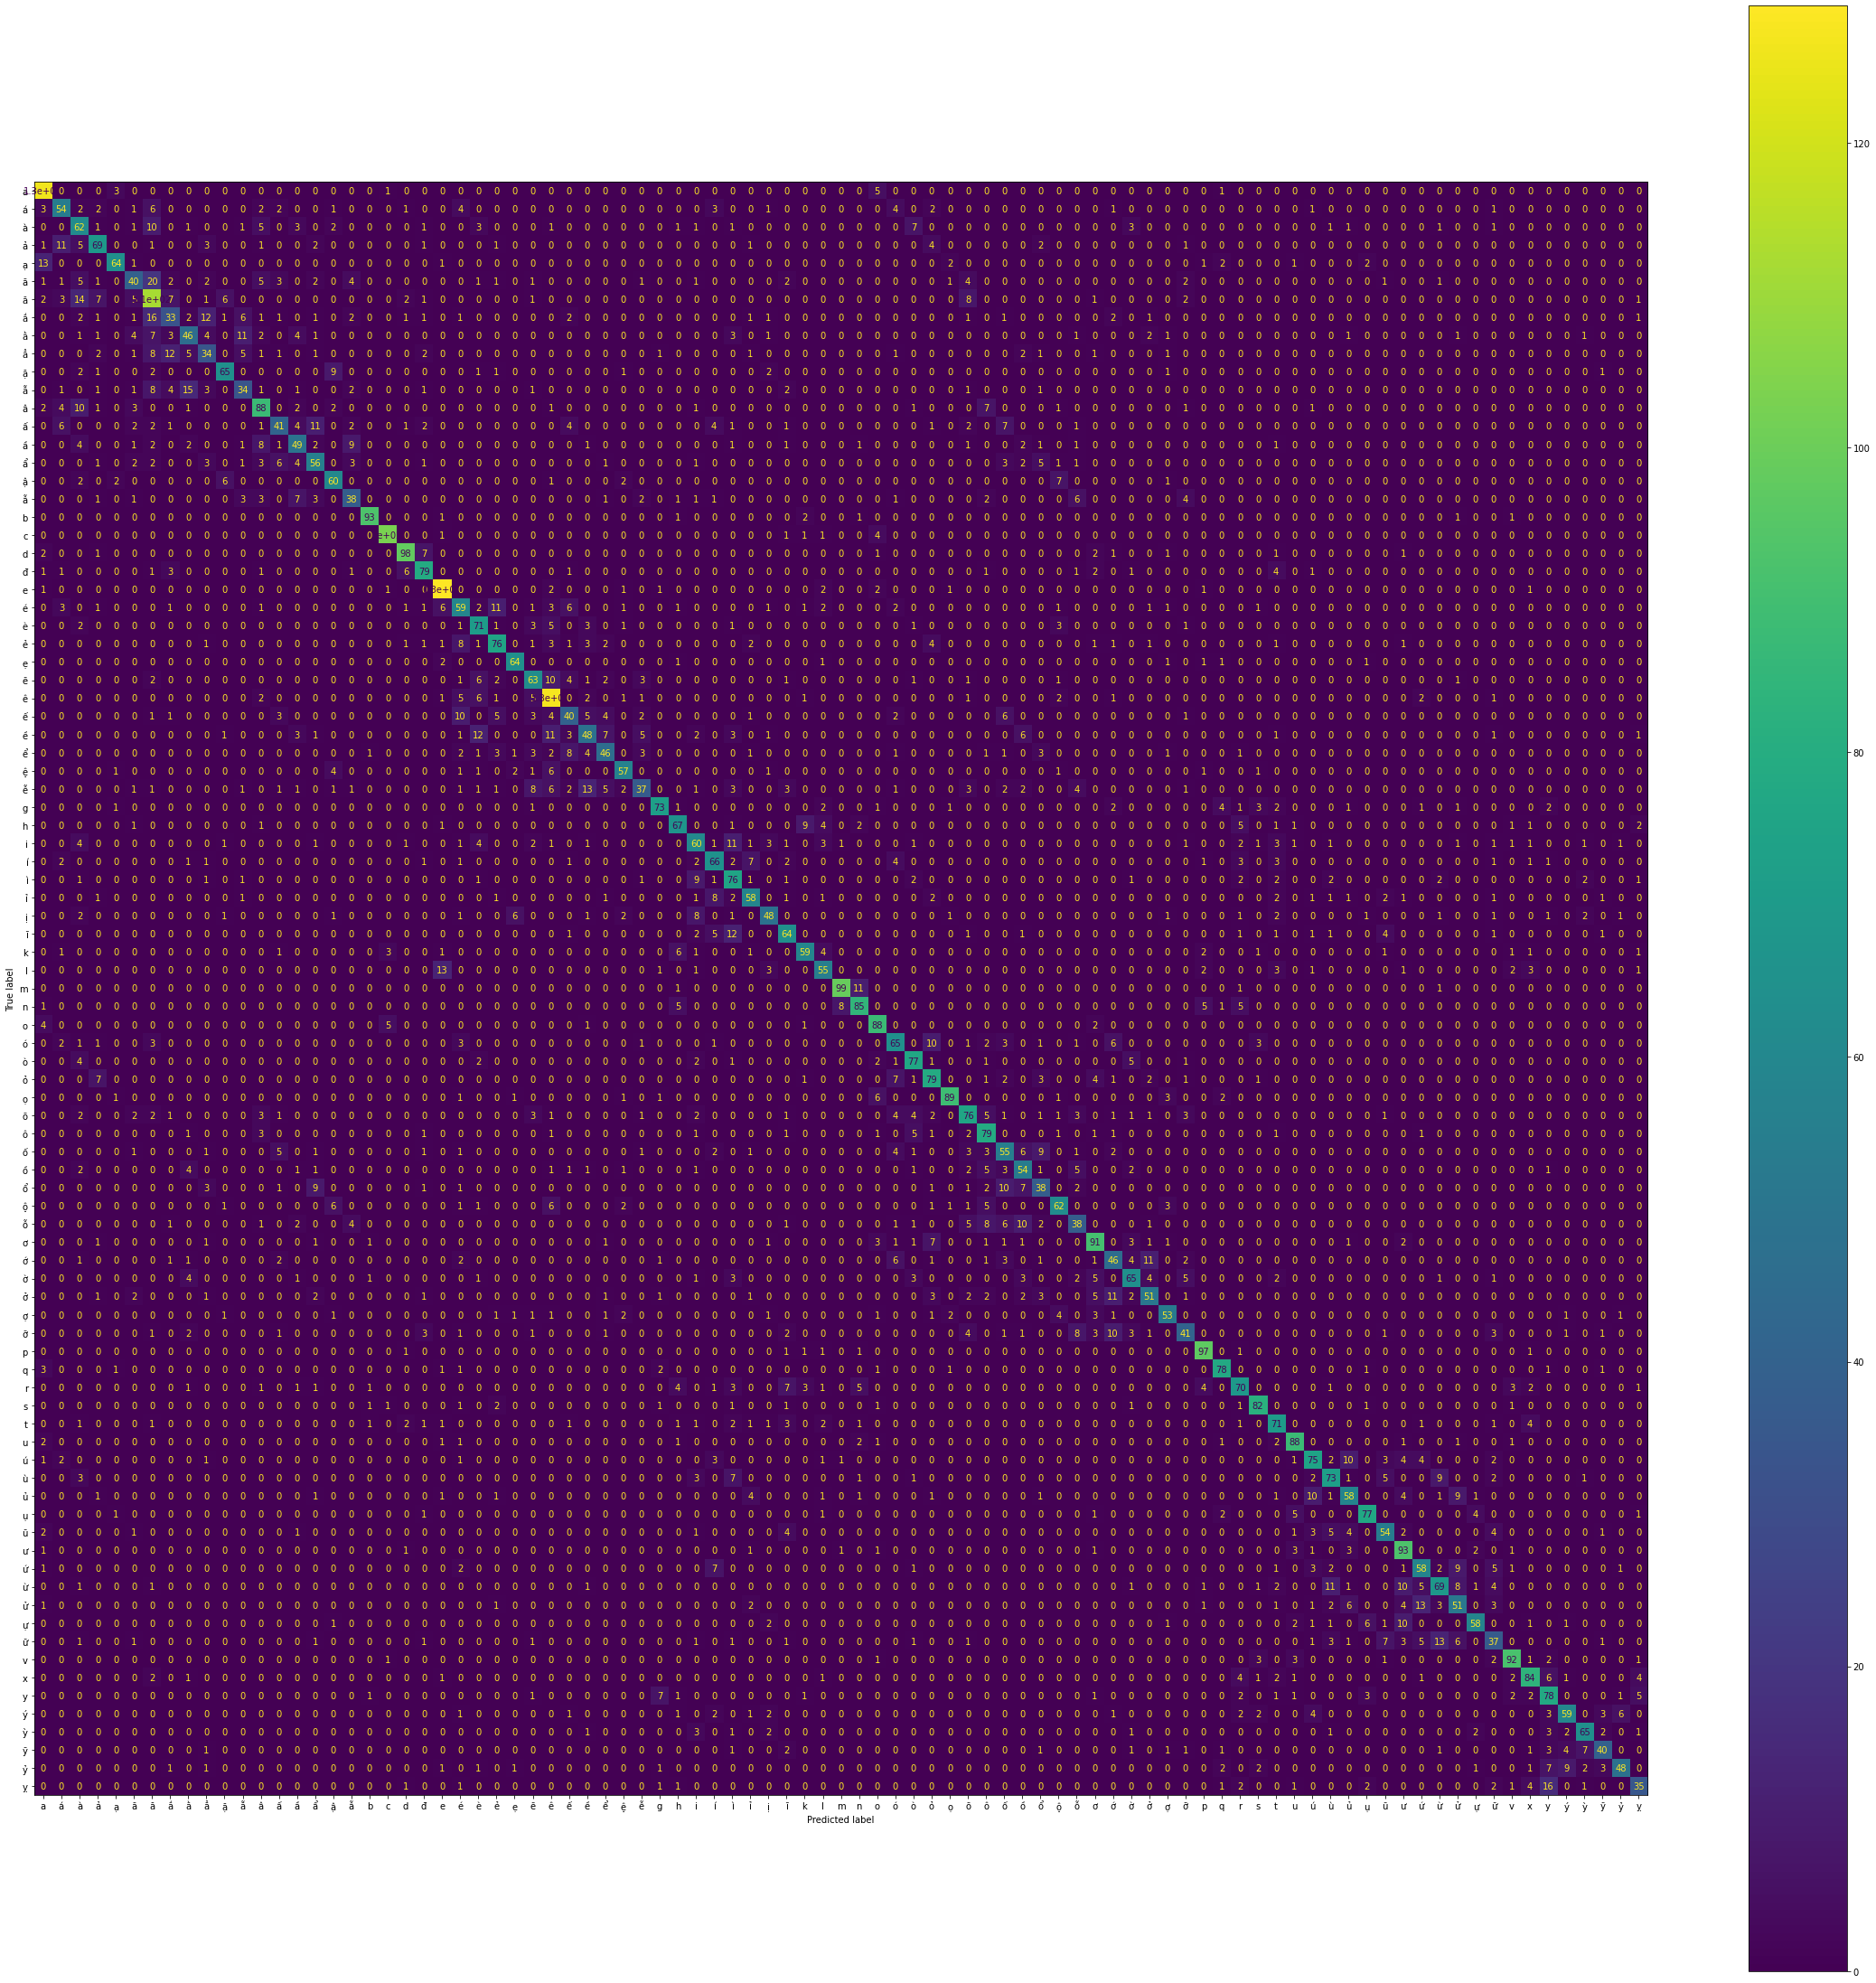

classification report on test set
              precision    recall  f1-score   support

           a       0.76      0.98      0.86       136
           á       0.63      0.65      0.64        91
           à       0.61      0.68      0.64       108
           ả       0.71      0.70      0.70       103
           ạ       0.88      0.76      0.81        87
           ã       0.64      0.55      0.59       102
           ă       0.57      0.77      0.65       173
           ắ       0.54      0.47      0.50        92
           ằ       0.68      0.61      0.64        95
           ẳ       0.57      0.50      0.53        80
           ặ       0.87      0.83      0.85        86
           ẵ       0.65      0.48      0.55        77
           â       0.64      0.81      0.71       126
           ấ       0.69      0.53      0.60        94
           ầ       0.71      0.61      0.65        89
           ẩ       0.66      0.61      0.64        96
           ậ       0.73      0.81      0.77    

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelSVM2.pickle", 'rb') as file_model:
    model = pickle.load(file_model)
    
print(f'Train Score: {modelLR.score(x_train, y_train)}')
cm = plot_confusion_matrix(model, x_train, y_train, display_labels=labels)
plt.show()
print(f'classification report on train set')
predictTrain = model.predict(x_train)
print(classification_report(y_train, predictTrain, target_names=labels))

print(f'Test Score: {model.score(x_test, y_test)}')
cm = plot_confusion_matrix(modelLR, x_test, y_test, display_labels=labels)
plt.show()
print(f'classification report on test set')
predictTest = model.predict(x_test)
print(classification_report(y_test, predictTest, target_names=labels))

# Neural Network

## NN layer = (2000, ), activation = logistic

In [ ]:
modelNN1 = MLPClassifier(hidden_layer_sizes=(2000,), activation='relu', max_iter=5000, random_state=42)
start_time = time.time()
modelNN1.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictTrain = modelNN1.predict(x_train)
predictTest = modelNN1.predict(x_test)
print(f'Train Score: {modelNN1.score(x_train, y_train)}')
print(f'Test Score: {modelNN1.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictTest, target_names=labels))

Timer: 973.4018061161041
Train Score: 0.9999619453535277
Test Score: 0.7283936522434068
classification report on train set
              precision    recall  f1-score   support

           a       1.00      1.00      1.00       450
           á       1.00      1.00      1.00       284
           à       1.00      1.00      1.00       308
           ả       1.00      1.00      1.00       298
           ạ       1.00      1.00      1.00       280
           ã       1.00      1.00      1.00       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      1.00      1.00       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      1.00      1.00       227
           â       1.00      1.00      1.00       347
           ấ       1.00      1.00      1.00       254
           ầ       1.00      1.00      1.00       299
           ẩ

In [ ]:
pickle.dump(modelNN1, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelNN1.pickle','wb'))

## NN layer = (1000, 1000 ), activation = logistic

In [ ]:
modelNN2 = MLPClassifier(hidden_layer_sizes=(2000,2000), activation='relu', max_iter=5000, random_state=42)
start_time = time.time()
modelNN2.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictTrain = modelNN2.predict(x_train)
predictTest = modelNN2.predict(x_test)
print(f'Train Score: {modelNN2.score(x_train, y_train)}')
print(f'Test Score: {modelNN2.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictTest, target_names=labels))

Timer: 1257.0375230312347
Train Score: 0.9885836060582998
Test Score: 0.7430071926018952
classification report on train set
              precision    recall  f1-score   support

           a       1.00      1.00      1.00       450
           á       0.97      0.99      0.98       284
           à       0.98      1.00      0.99       308
           ả       1.00      0.99      0.99       298
           ạ       1.00      1.00      1.00       280
           ã       1.00      0.96      0.98       308
           ă       0.96      1.00      0.98       491
           ắ       1.00      1.00      1.00       258
           ằ       0.98      1.00      0.99       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      0.96      0.98       227
           â       1.00      1.00      1.00       347
           ấ       1.00      0.87      0.93       254
           ầ       0.98      1.00      0.99       299
           

In [ ]:
pickle.dump(modelNN2, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelNN2.pickle','wb'))

## NN layer (1000, 1000, 1000)

In [ ]:
modelNN3 = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), activation='relu', max_iter=5000, random_state=42)
start_time = time.time()
modelNN3.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictTrain = modelNN3.predict(x_train)
predictTest = modelNN3.predict(x_test)
print(f'Train Score: {modelNN3.score(x_train, y_train)}')
print(f'Test Score: {modelNN3.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictTest, target_names=labels))

Timer: 1472.2217144966125
Train Score: 0.9945962402009285
Test Score: 0.7414088366251855
classification report on train set
              precision    recall  f1-score   support

           a       1.00      0.97      0.98       450
           á       1.00      0.99      1.00       284
           à       1.00      1.00      1.00       308
           ả       1.00      1.00      1.00       298
           ạ       1.00      1.00      1.00       280
           ã       1.00      0.99      1.00       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      1.00      1.00       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      0.99      0.99       242
           ẵ       1.00      1.00      1.00       227
           â       1.00      0.99      0.99       347
           ấ       1.00      1.00      1.00       254
           ầ       1.00      0.98      0.99       299
           

In [ ]:
pickle.dump(modelNN3, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_HOG/modelNN3.pickle','wb'))